## Table of Contents:
#### 01. Importing the libraries
#### 02. Importing the dataset
#### 03. Creating a Correlation Matrix Heatmap
#### 04. Creating a Scatterplot and Categorical plot
#### 05. Creating a Pair plot for the entire dataset
#### 06. Creating a Categorical plot
#### 07. Key Questions to be Explored
#### 08. Hypothesis
#### 09. Exporting the dataset with the rent category flag

## 01. Importing the libraries

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os

In [2]:
# checking the version of matplotlib

matplotlib.__version__

'3.7.1'

In [3]:
# ensuring that the charts are displayed in the notebook

%matplotlib inline

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

## 02. Importing the dataset

In [5]:
# defining the path

path=r'/Users/sanju/Documents/Apartment Rental Analysis in Berlin '

In [6]:
# importing the dataset

df =pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','immo_data_clean.pkl'))

In [7]:
pd.options.display.max_columns=None

## 03. Creating a Correlation Matrix Heatmap

In [9]:
# creating a subset with the relevant variables(columns with only numerical values & booleans)

df_sub=df[['serviceCharge','balcony','totalRent','yearConstructed','hasKitchen','cellar','baseRent','livingSpace','lift','noRooms','floor','garden']]

In [10]:
# creating a correlation matrix using pandas

df_sub.corr()

,serviceCharge,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,lift,noRooms,floor,garden
serviceCharge,1.000000,0.186157,0.674420,0.160787,0.137093,0.135207,0.601084,0.647681,0.215413,0.530297,0.074021,0.102858
balcony,0.186157,1.000000,0.201117,0.255575,0.114176,0.231149,0.186635,0.222774,0.242017,0.214583,0.061041,0.093218
totalRent,0.674420,0.201117,1.000000,0.108242,0.297759,0.143234,0.990441,0.810851,0.245487,0.643714,0.108887,0.115482
yearConstructed,0.160787,0.255575,0.108242,1.000000,0.173020,0.178762,0.092719,-0.004498,0.473213,0.054329,0.086165,0.093681
hasKitchen,0.137093,0.114176,0.297759,0.173020,1.000000,0.192304,0.311599,0.097891,0.181709,0.037219,0.014149,0.149927
cellar,0.135207,0.231149,0.143234,0.178762,0.192304,1.000000,0.134656,0.123947,0.168330,0.115767,-0.033107,0.138853
baseRent,0.601084,0.186635,0.990441,0.092719,0.311599,0.134656,1.000000,0.773355,0.234943,0.609386,0.110757,0.112932
livingSpace,0.647681,0.222774,0.810851,-0.004498,0.097891,0.123947,0.773355,1.000000,0.076764,0.831823,0.043924,0.099451
lift,0.215413,0.242017,0.245487,0.473213,0.181709,0.168330,0.234943,0.076764,1.000000,0.035909,0.240808,-0.009354
noRooms,0.530297,0.214583,0.643714,0.054329,0.037219,0.115767,0.609386,0.831823,0.035909,1.000000,0.018797,0.090330


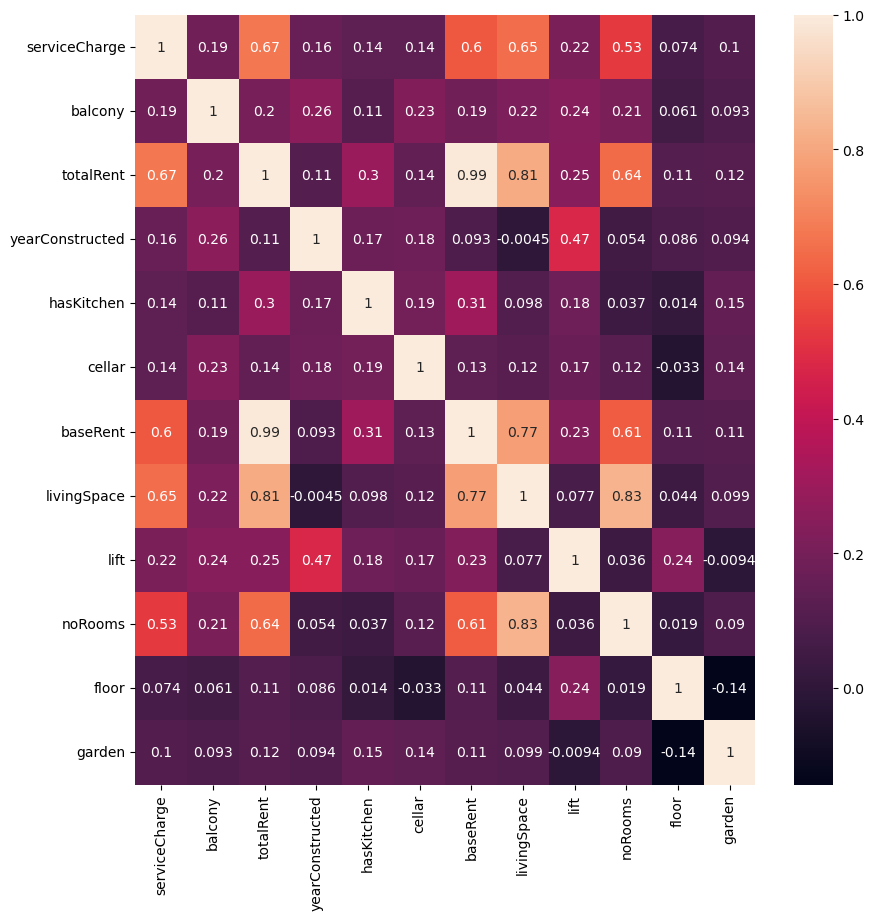

In [11]:
# creating a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

#creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

#### Here we can see that there is a strong positive relationship between totalRent with serviceCharge, baseRent, livingSpace & noRooms. The baseRent and totalRent is almost perfectly correlated(0.99) which totally makes sense. So I am more interested in the strong positive correlation between the totalRent with livingSpace and noRooms. Also, though there is a weak relation between totalRent and yearConstructed, still I would like to explore this to see if there is any trend. The other variables doesn't seem to influence the totalRent much. 

In [12]:
# exporting the above visualization

corr.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','corr_heatmap.png'),bbox_inches='tight')

## 04. Creating a Scatterplot & Categorical plot

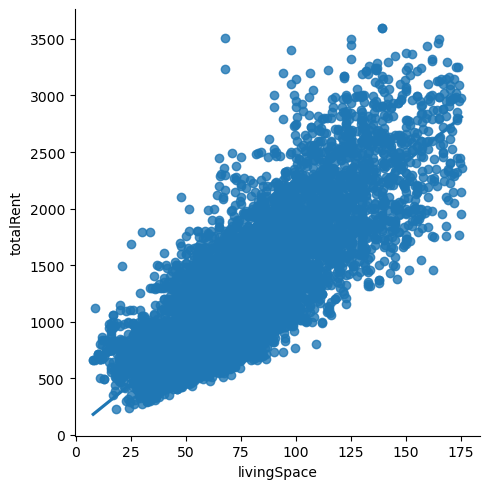

In [13]:
# creating a scatterplot between totalRent and livingSpace in seaborn

lspace_rent=sns.lmplot(x = 'livingSpace', y = 'totalRent', data = df)

#### Here we can see that there is indeed a strong positive relationship between totalRent and livingSpace. There are few cases where the livingSpace seems to be little less but the rent is still high and vice versa, but those could be the reason of the locality of the rental.

In [14]:
# exporting the above visualization

lspace_rent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','living_space_rent.png'),bbox_inches='tight')

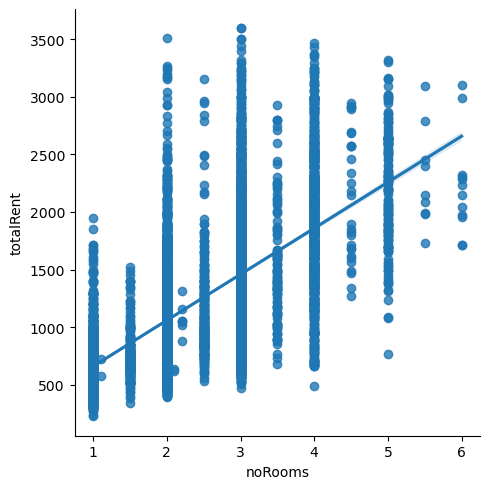

In [15]:
# creating a categorical plot between totalRent and noRooms in seaborn

rooms_rent=sns.lmplot(x = 'noRooms', y = 'totalRent', data = df)

#### Here we can see that as the number of room have increased, the total rent has also increased. 

In [16]:
# exporting the above visualization

rooms_rent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','rooms_rent.png'),bbox_inches='tight')

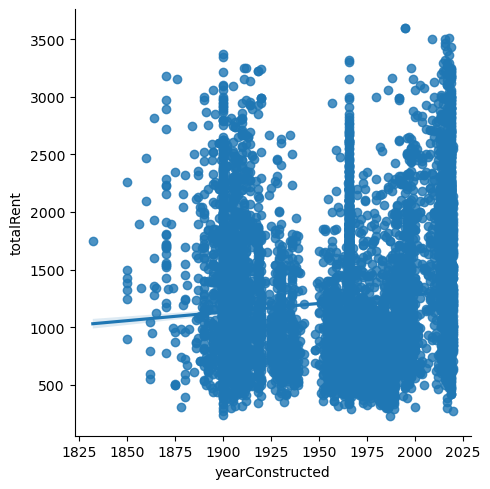

In [17]:
# creating a scatterplot between yearConstruced and totalRent

const_rent=sns.lmplot(x = 'yearConstructed', y = 'totalRent', data = df)

#### Here we can see that the rentals constructed in between 1900 to 1920 have high rents. Constructions from 1920 to 2000 have moderate rents, and most of the constructions after 2000 have high rents.

In [18]:
# exporting the above visualization

const_rent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','const_year_rent.png'),bbox_inches='tight')

## 05. Creating a Pair plot for the entire dataset

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


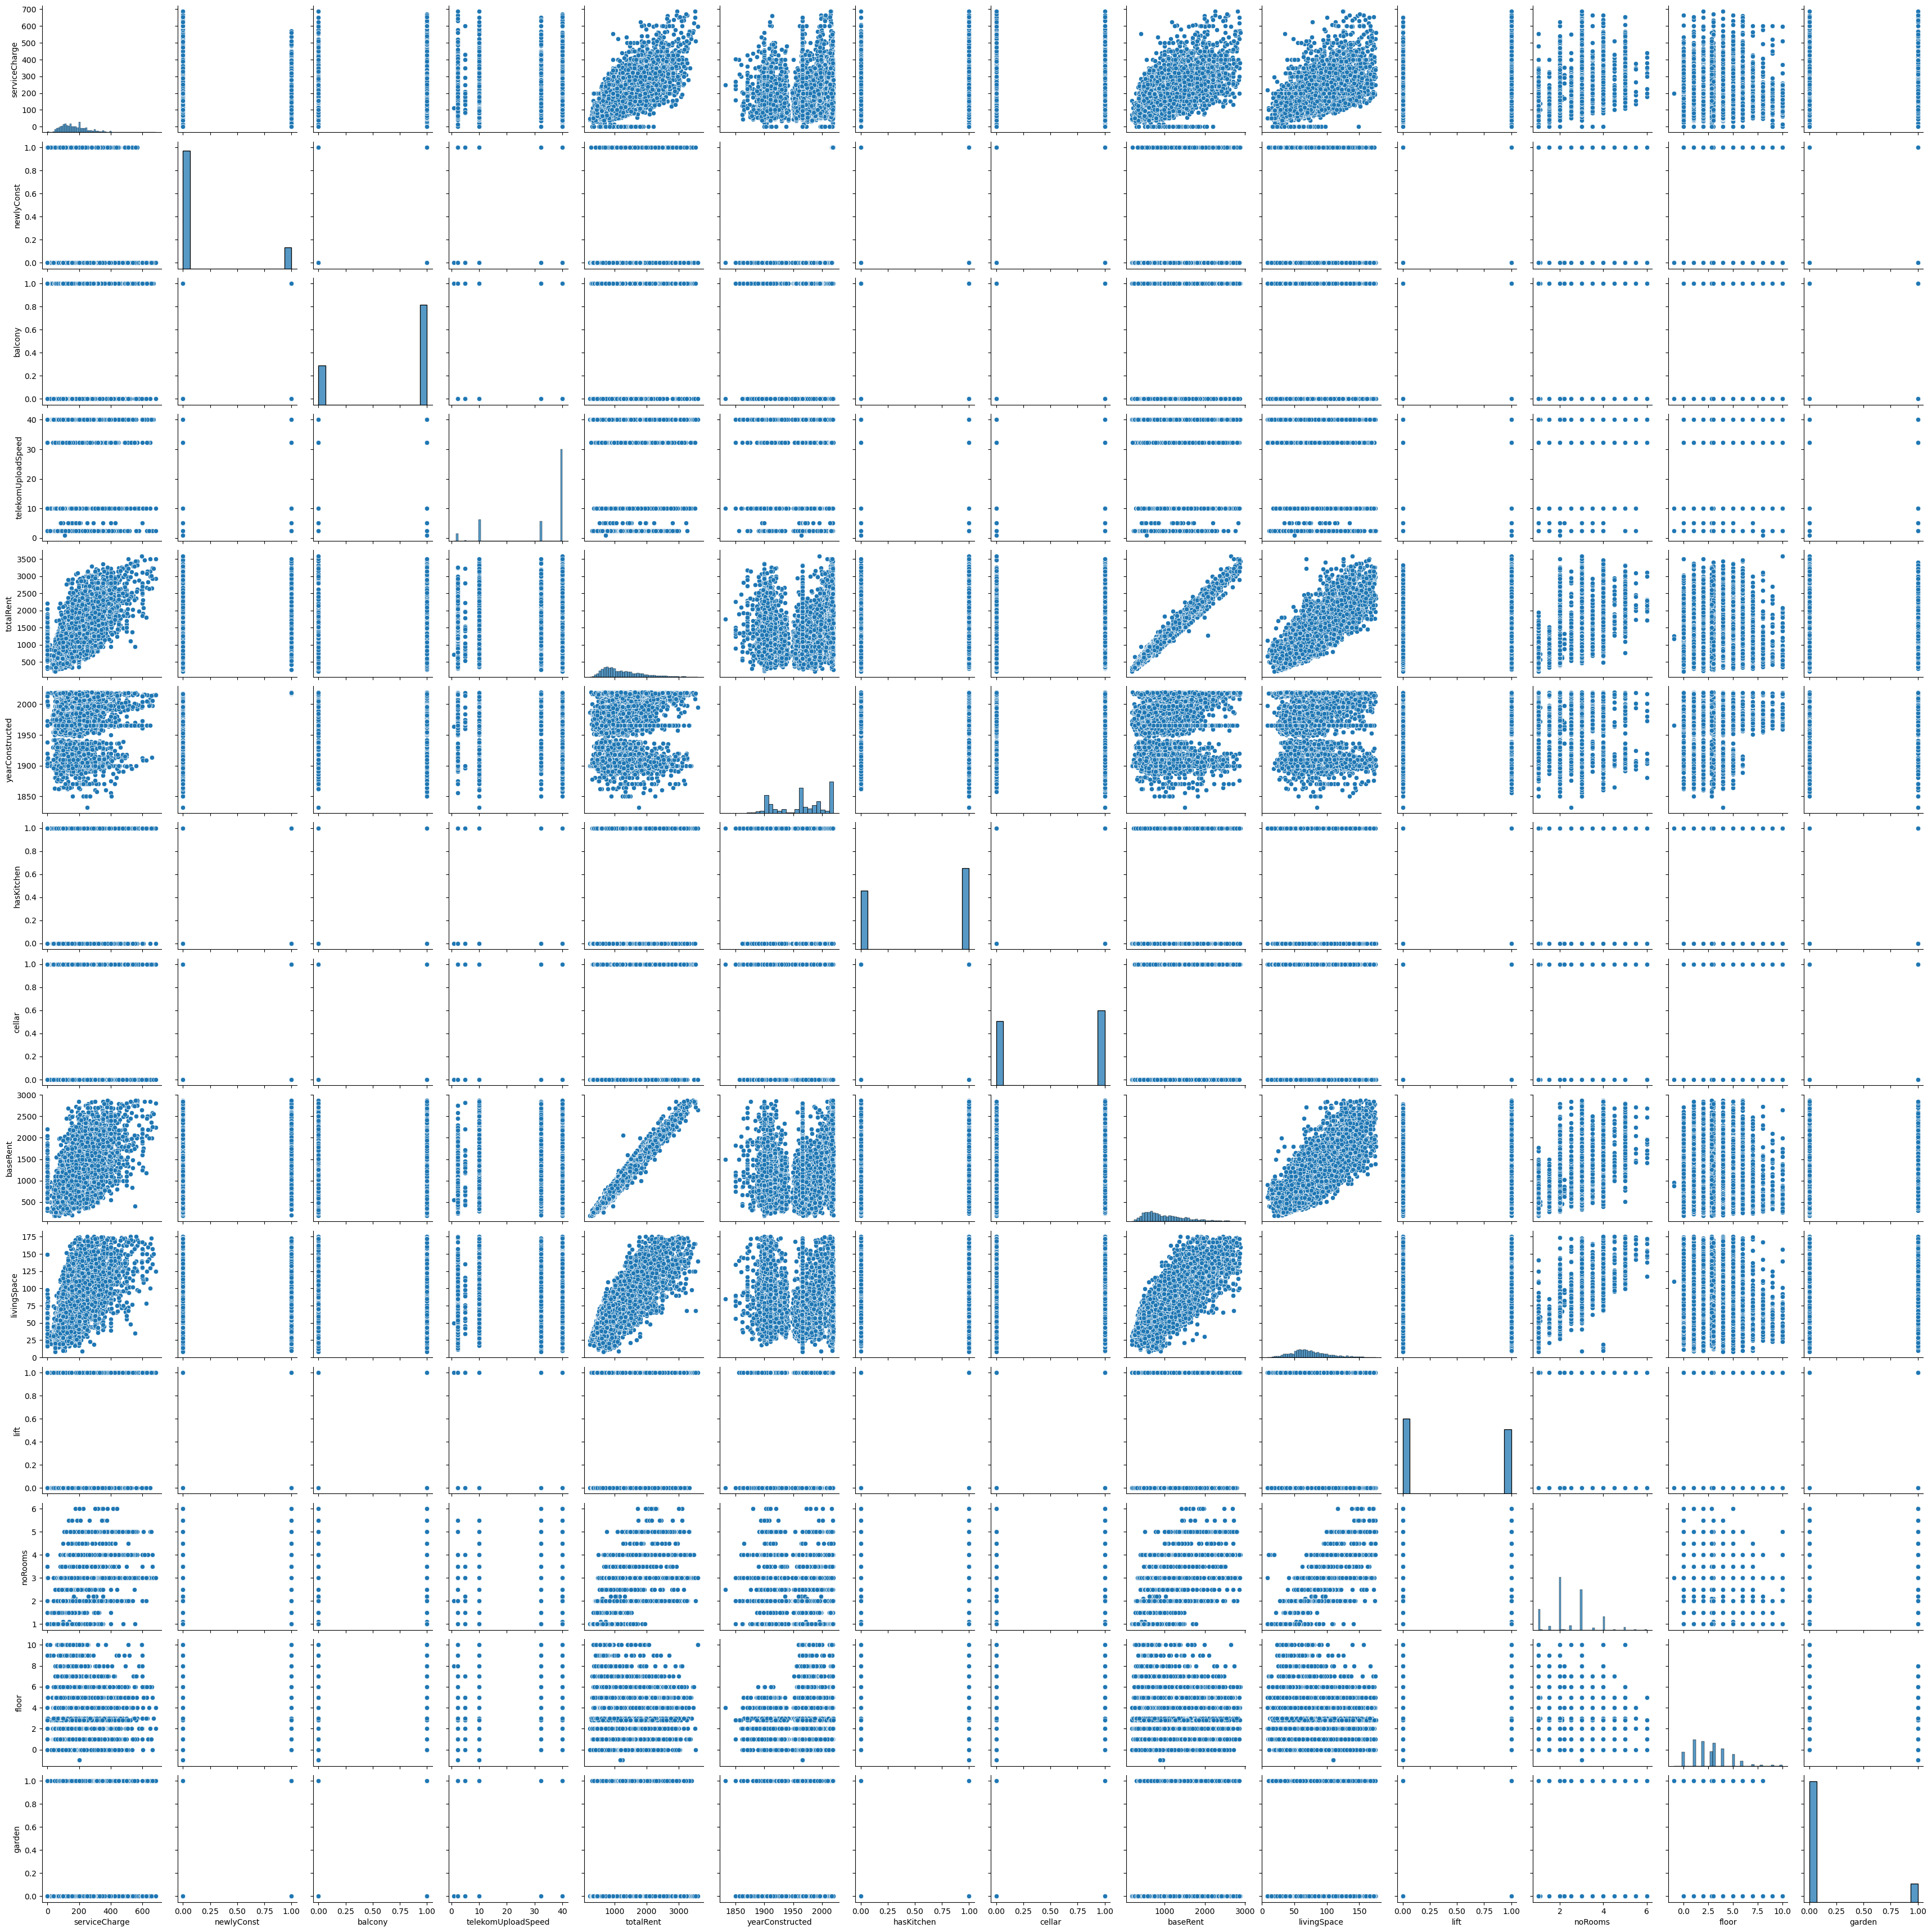

In [19]:
g = sns.pairplot(df)

#### Based on this pair plot, it can still be said that there is a strong relationship between the totalRent and livingSpace and noRooms. 

In [20]:
# exporting the above visualization

g.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pair_plot.png'),bbox_inches='tight')

## 06. Creating a Categorical plot

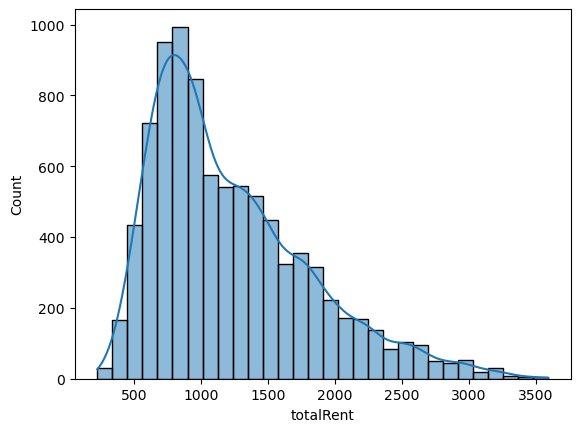

In [21]:
# creating a histogram of the totalRent column 

hist_rent=sns.histplot(df['totalRent'],bins = 30, kde = True)

In [22]:
# exporting the above visualization

hist_rent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_rent.png'),bbox_inches='tight')

In [23]:
# creating a flag

df.loc[df['totalRent'] < 500, 'Rent category'] = 'Low rent'

In [24]:
df.loc[(df['totalRent'] >= 500) & (df['totalRent'] < 1800), 'Rent category'] = 'Medium rent'

In [25]:
df.loc[df['totalRent'] >= 1800, 'Rent category'] = 'High rent'

In [26]:
df['Rent category'].value_counts(dropna=False)

Medium rent    7118
High rent      1503
Low rent        338
Name: Rent category, dtype: int64

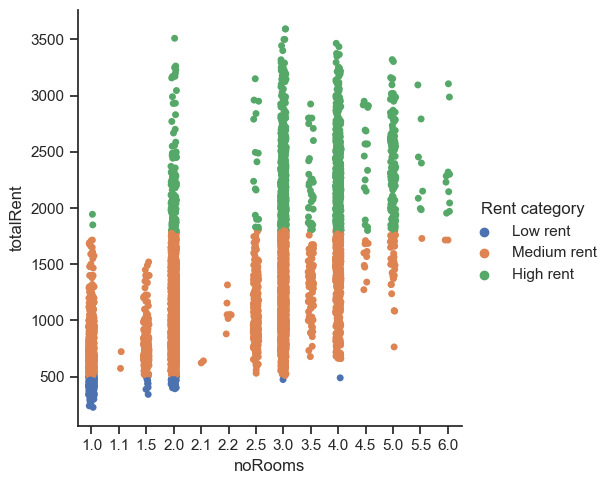

In [27]:
# Creating a categorical plot in seaborn using the rent categories created above and 'noRooms'

sns.set(style='ticks')
cat_rooms_rent = sns.catplot(x='noRooms', y='totalRent', hue='Rent category', data=df)

#### Most of the low rent apartments have 1 or 2 rooms. There seems to be 2 low rent aparments having 3 and 4 rooms respectively. Again, this may be because of the location. Also, there seems to be 2 high rent apartments having just 1 room. Will try to explore these while checking the geospatial analysis.

In [28]:
# exporting the above visualization

cat_rooms_rent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cat_rooms_rent.png'),bbox_inches='tight')

In [29]:
df['typeOfFlat'].value_counts(dropna=False)

apartment              6435
ground_floor            860
roof_storey             795
maisonette              201
other                   198
raised_ground_floor     188
terraced_flat           119
penthouse                99
loft                     42
half_basement            22
Name: typeOfFlat, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ground_floor'),
  Text(1, 0, 'apartment'),
  Text(2, 0, 'roof_storey'),
  Text(3, 0, 'penthouse'),
  Text(4, 0, 'raised_ground_floor'),
  Text(5, 0, 'maisonette'),
  Text(6, 0, 'other'),
  Text(7, 0, 'half_basement'),
  Text(8, 0, 'terraced_flat'),
  Text(9, 0, 'loft')])

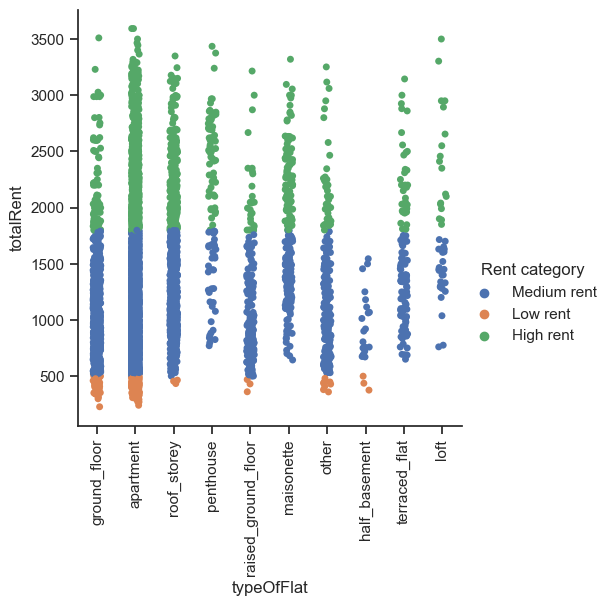

In [30]:
# Creating a categorical plot in seaborn using the rent categories created above and 'typeOfFlat'

sns.set(style='ticks')
rent_typeOfFlat = sns.catplot(x='typeOfFlat', y='totalRent', hue='Rent category', data=df)
plt.xticks(rotation=90)

#### Here we can see that most of the low rent offers are either in the ground floor of are apartment. But there doesn't seem to be a strong relationship between the total rent and the type of flat.

In [31]:
# exporting the above visualization

rent_typeOfFlat.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','rent_typeOfFalt.png'),bbox_inches='tight')

## 07. Key Questions to be Explored

#### 01. How does the rent vary based on the type of flat?

There seems to be no relationship between the total rent and the type of the flat. 

#### 02. Does the rent depend on the construction year of the flat?

The rentals constructed in between 1900 to 1920 have high rents. Constructions from 1920 to 2000 have moderate rents, and most of the constructions after 2000 have high rents.

#### 03. Is there any correlation between all the facilities provided in the flat with the total rent?

There seems to be a strong positive relationhip between the total rent with the service charges, base rent, living space and no. of rooms.

## 08. Hypothesis

1. As the living space of a rental increases, the total rent also increases.
2. As the number of rooms of a rental increases, the total rent also increases.

## 09. Exporting the dataset with the rent category flag

In [33]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','immo_data_derived.csv'))